In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import spacy
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk import RegexpTokenizer

In [134]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [135]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import pandas as pd

# 1. Scraping Twitter

In [136]:
# INSTALL PYTHON TWITTER
# MORE INFO @ https://python-twitter.readthedocs.io/en/latest/installation.html
import twitter

In [9]:
#INSERT YOUR KEYS AND TOKENS PROVIDED ON TWITTER DEVELOPER ACCOUNT 
api = twitter.Api(consumer_key="APIKEY",
                  consumer_secret="APISECRETKEY",
                  access_token_key="ACCESSTOKEN",
                  access_token_secret="ACCESSTOKENSECRET")

In [10]:
#RUNNING A SEARCH ON TWITTER THROUGH A QUERY
tweets = api.GetSearch(
    raw_query="q=venezolanosenelexterior&src=typd")

In [ ]:
#RUNNING A SEARCH THROUGH GEO LOCATION
api.GetSearch(geocode=("37.781157", "-122.398720", "1mi"))

## 2. Loading the data

In [137]:
##LOAD THE FILE WITH TWEETS GATHERED
tweets = pd.read_csv('./tweets.csv')
print(tweets.shape)
tweets.head(3)

(86126, 19)


,Unnamed: 0,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,0,1.119288e+18,edgarjmendezt,#familytime #cookingtime #friday #venezolanose...,Fri Apr 19 17:12:35 +0000 2019,19/04/2019 18:12:35,"loc: 28.5421,-81.3775",es,NaN,NaN,2.929930e+08,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",http://pbs.twimg.com/profile_images/1093853883...,139.0,201.0,"Orlando, Florida, USA",http://twitter.com/edgarjmendezt/statuses/1119...,"{""hashtags"":[{""text"":""familytime"",""indices"":[0..."
1,1,1.119286e+18,buenoGordoFeo,Síguenos en Facebook https://t.co/PUeOCLyxPd\n...,Fri Apr 19 17:07:04 +0000 2019,19/04/2019 18:07:04,NaN,es,NaN,NaN,8.833677e+07,NaN,"<a href=""http://www.sendurtweet.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1052068854...,1134.0,2202.0,"Santiago, Chile",http://twitter.com/buenoGordoFeo/statuses/1119...,"{""hashtags"":[{""text"":""BGF"",""indices"":[45,49]},..."
2,2,1.119286e+18,paellayolecater,🍴EXQUISITE GASTRONOMY🤤\n\n.\n.\n\n👏A team will...,Fri Apr 19 17:04:21 +0000 2019,19/04/2019 18:04:21,NaN,es,NaN,NaN,2.422603e+09,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1080555416...,262.0,3018.0,"Miami, FL",http://twitter.com/paellayolecater/statuses/11...,"{""hashtags"":[{""text"":""miami"",""indices"":[96,102..."


## 3. Exploratory data analysis

In [138]:
##EXPLORE VARIABLES
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86126 entries, 0 to 86125
Data columns (total 19 columns):
Unnamed: 0                   86126 non-null int64
id_str                       86108 non-null float64
from_user                    86108 non-null object
text                         86108 non-null object
created_at                   86108 non-null object
time                         86108 non-null object
geo_coordinates              3307 non-null object
user_lang                    86108 non-null object
in_reply_to_user_id_str      2483 non-null float64
in_reply_to_screen_name      2483 non-null object
from_user_id_str             86108 non-null float64
in_reply_to_status_id_str    1313 non-null float64
source                       86108 non-null object
profile_image_url            86108 non-null object
user_followers_count         85318 non-null float64
user_friends_count           84879 non-null float64
user_location                60787 non-null object
status_url             

In [139]:
## FIND SHAPE OF YOUR DATAFRAME
tweets.shape

(86126, 19)

In [140]:
##NUMBER OF UNIQUE LOCATIONS FOR TWEETS WITH GEO_COORDINATES
len(tweets.geo_coordinates.unique())

484

In [141]:
##NUMBER OF TWEETS WITHOUT GEO_COORDINATES
tweets.geo_coordinates.isnull().sum()

82819

In [142]:
##% OF TWEETS WITH GEO_COORDINATES
geolocationperc = (1-(tweets.geo_coordinates.isnull().sum()/86126))
geolocationperc

0.03839723196247358

In [143]:
##NUMBER OF TWEETS BY GEO_COORDINATE
tweets.geo_coordinates.value_counts()

loc: -33.45,-70.6667              336
loc: -33.42954,-70.61881          300
loc: -33.43777778,-70.65027778    195
loc: 8,-65                        101
loc: -12.0611,-77.0353             87
loc: 10.5056,-66.9136              81
loc: 28.5421,-81.3775              76
loc: 4.5997,-74.0794               72
loc: -34.55686818,-58.4133966      64
loc: 25.7752,-80.192               56
loc: 26.02827,-80.16886            46
loc: 19.4326,-99.1332              42
loc: -34.6086,-58.3734             38
loc: 21.1812,-86.8322              36
loc: -0.2158,-78.5103              36
loc: 3.816667,-73.916667           27
loc: -34.37194444,-71.12452778     23
loc: -34.1667,-70.75               21
loc: -34.6089,-58.4397             18
loc: 25.6706,-80.436               18
loc: 40.4,-3.68333                 17
loc: 26.08466,-80.3711             16
loc: -38.7395,-72.6109             16
loc: -31.4,-64.1833                16
loc: -29.9533,-71.3436             14
loc: -12.0678,-76.9584             14
loc: 20.0833

## 4. Gathering Tweets

In [144]:
##GENERATE A LIST OF ALL YOUR TWEETS TO LATER WORK WITH NLP
tweets_text=[]
for tweet in tweets.text:
    a = str(tweet)
    tweets_text.append(a)

In [145]:
##SEE YOUR LIST OF TWEETS
tweets_text[:5]

['#familytime #cookingtime #friday #venezolanosenelexterior #blessed #lifestyle #scruff #scruffapp @ Orlando, Florida https://t.co/aY1BKU8BfD',
 'Síguenos en Facebook https://t.co/PUeOCLyxPd\n#BGF #Podcat #PodCasting #Venezuela #Venezolanos #VenezolanosenChile #Chile',
 '🍴EXQUISITE GASTRONOMY🤤\n\n.\n.\n\n👏A team willing to offer you the best. Book now 📞786-3461390 🥘🍲🥗\n\n #miami #miamievents #doral #weeding #paellayolecatering #bestpaellamiami #bestspanishfoodintown #bestcatering #bestpaella #dadecounty #venezolanosenmiami  #19Abril https://t.co/pMGaZtL6tM',
 'Recomendación para los peluqueros caninos: no vayan al baño mientras trabajan porque los clientes inventan mucho\n\n#venezolanosenelmundo #venezolanosenelextranjero #venezolanosenchile💛💙❤… https://t.co/qVsS2iP7Qw',
 'Recomendación para los peluqueros caninos: no vayan al baño mientras trabajan porque los clientes inventan mucho\n\n#venezolanosenelmundo #venezolanosenelextranjero #venezolanosenchile💛💙❤… https://t.co/qVsS2iP7Qw']

## 5. Natural Language Processing

In [42]:
##IMPORT NLP LIB IN SPANISH AND LIST OF STOPWORDS IN SPANISH
import es_core_news_sm
nlp = es_core_news_sm.load()
stopwordses = pd.read_json('./stopwords-es.json')

In [43]:
##GENERATE A LIST OF STOPWORDS IN SPANISH
stopwordses = stopwordses.rename(columns={0: 'word'})
stopwordsespanol=[]
for word in stopwordses.word:
    stopwordsespanol.append(word)

In [44]:
##ADDING WORDS TO LIST OF STOPWORDS TO NOT CONSIDER #S, EMOJIS AND OTHER WORDS THAT DO NOT ADD VALUE
stopwordsespanol.append('rt')
stopwordsespanol.append('venezuela')
stopwordsespanol.append('venezolanosenperu') 
stopwordsespanol.append('venezolanosenmiami')
stopwordsespanol.append('venezolanosenargentina')
stopwordsespanol.append('sosvenezuela')
stopwordsespanol.append('venezolanosenelmundo')
stopwordsespanol.append('🇪')
stopwordsespanol.append('venezolanosenchile')
stopwordsespanol.append('venezolanosenelexterior')
stopwordsespanol.append('chile')
stopwordsespanol.append('venezolano')
stopwordsespanol.append('@manoolete')
stopwordsespanol.append('🇻')
stopwordsespanol.append('2do')
stopwordsespanol.append('…')
stopwordsespanol.append('venezolanosenperú')
stopwordsespanol.append('...')
stopwordsespanol.append('santiago')
stopwordsespanol.append('perú')
stopwordsespanol.append('miami')
stopwordsespanol.append('halloween')
stopwordsespanol.append('mesdelhorroramc')
stopwordsespanol.append('teamhdp')
stopwordsespanol.append('venezolanosencolombia')
stopwordsespanol.append('venezolanosenecuador')
stopwordsespanol.append('venezolanosenbrasil')
stopwordsespanol.append('venezolanosenuruguay')
stopwordsespanol.append('venezolanosenparaguay')
stopwordsespanol.append('venezolanosenmexico')
stopwordsespanol.append('venezolanosenpanama')
stopwordsespanol.append('venezolanosencostarica')
stopwordsespanol.append('venezolanosenguatemala')
stopwordsespanol.append('venezolanosenhonduras')
stopwordsespanol.append('venezolanosenelsalvador')
stopwordsespanol.append('¿')
stopwordsespanol.append('¡')
stopwordsespanol.append('venezolanos')
stopwordsespanol.append('peru')
stopwordsespanol.append('☆')
stopwordsespanol.append( '️')
stopwordsespanol.append('🇨')
stopwordsespanol.append('ecuador')
stopwordsespanol.append('venezolanosenbogota')
stopwordsespanol.append('venezolanosenespaña')
stopwordsespanol.append('🔥')
stopwordsespanol.append('•')
stopwordsespanol.append('venezolanosenlima')
stopwordsespanol.append('venezolanosporelmundo')
stopwordsespanol.append('venezolanosenusa')
stopwordsespanol.append('colombia')
stopwordsespanol.append('venezolanosenmadrid')
stopwordsespanol.append('venezolanosenelextranjero')
stopwordsespanol.append('venezolanosenorlando')
stopwordsespanol.append('❤')
stopwordsespanol.append('😂')
stopwordsespanol.append('🤣')
stopwordsespanol.append('👏')

In [45]:
##USING SPACY TO CLEAN TWEETS APPLYING TOKENIZING, LEMMATIZING, REMOVING STOPWORDS AND PUNCTUATIONS
## IMPORT SPACY AND ACTIVATE ITS SPANISH MODULE
import spacy
nlp = es_core_news_sm.load()
punctuations = string.punctuation

#FUNCTION TO CLEAN UP TEXT
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner']) #DISABLING DEFAULT MODELS OF SPACY
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']  #APPLYING TOKENIZING AND LEMMATIZING
        tokens = [tok for tok in tokens if tok not in stopwordsespanol and tok not in punctuations] #REMOVING STOPWORDS AND PUNCTUATIONS
        tokens = filter(lambda t: not t.startswith('@'), tokens)
        tokens = filter(lambda t: not t.startswith('#'), tokens)
        tokens = filter(lambda t: not t.startswith('http'), tokens)
        tokens = ' '.join(tokens) 
        texts.append(tokens)  #APPENDING CLEAN TITLES TO TEXTS LIST
    return pd.Series(texts)   #RETURNING TEXTS LIST AS PD SERIES

tweets_clean = cleanup_text(tweets_text) #APPLYING CLEAN UP FUNCTION TO LIST OF TWEETS
tweets_clean = ' '.join(tweets_clean).split() #SPLITING TWEETS 

tweets_counts = Counter(tweets_clean) #COUNT TWEETS

tweets_common_words = [word[0] for word in tweets_counts.most_common(50)]  #GENERATE LIST OF 50 MOST COMMON WORDS
tweets_common_counts = [word[1] for word in tweets_counts.most_common(50)] #GENERATE LIST FOR COMMON COUNTS


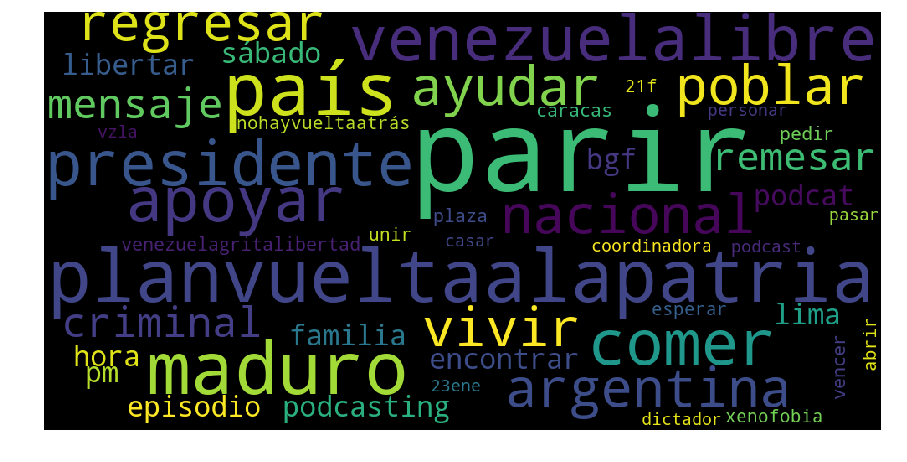

In [399]:
##CREATE A WORDCLOUD GRAPH WITH THE 50 MOST COMMON WORDS
#IMPORT LIBRARIES
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#CONVERT LIST TO STRING 
unique_string=(" ").join(tweets_common_words)
#CREATE THE WORDCLOUD WITH ITS CHARACTERISTICS BACKGROUND COLOR AND SIZE
wordcloud = WordCloud(background_color='black', width = 1000, height = 500).generate(unique_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

## 6. Classification model with Word2vec

In [48]:
## GENERATE BAG OF WORDS WITH KEY TERMS FOR EACH CATEGORY
identidad = ['pasaporte', 'visa', 'asilo', 'refugiado', 'status', 'identidad', 'soy', 'cédula', 'identidad', 'chavista', 'escuálido', 'opositor', 'socialista', 'comunista', 'activismo', 'cuba', 'rusia', 'guardia naciional', 'diáspora',
             'apostilla', 'antecedentespenales', 'antecedentes penales', 'tramitelegales', 'trámites', 'tramites legales', 'gestiondetramites', 'gestión de trámites', 'escritoriojuridico', 'escritorio juridico',
            'boda', 'matrimonio', 'proceso migratorio', 'legalizar', 'apostillar', 'articulo', 'artículo', 'datos migratorios', 'actualizar', 'prorroga', 'prórroga', 'solicitud', 'documentación', 'emigrante']

refugio = ['seguridad', 'casa', 'hospedaje', 'dormir', 'estadía', 'estadia', 'comida', 'litro de leche', 'arepas', 
           'refugio', 'protección', 'lugar', 'colchón', 'pertenencias', 'objetos', 'cosa', 'personales', 'necesidades basicas', 'necesidades básicas',
          'barrio', 'mansión', 'rancho', 'derechos humanos', 'inmueble', 'apartamento', 'departamento', 'ayuda humanitaria', 'ayuda', 'dinero', 'efectivo', 'crédito',
          'servicios para la comunidad', 'carga', 'transporte', 'departamento'] 

empleo = ['permiso', 'trabajo', 'sueldo', 'empleo', 'chaucha', 'jefe', 'empleado', 'salario', 'trabajar', 'chamba', 'trabajito', 'dinero', 'ingreso', 'laborando', 'dólares', 'canasta básica', 'inflación', 'sueldo mínimo',
          'manicure', 'pedicure', 'peluqueria', 'ventas', 'empresa', 'pagos', 'laborando', 'taxista', 'rider', 'biker', 'puertas a dentro' ]

salud = ['enfermedad', 'asistencia', 'doctor', 'salud', 'medicamentos', 'hospitales', 'diabetes', 'dialisis', 'diálisis',
         'vacunas', 'prescripción', 'receta', 'suministros', 'sarampión', 'tensión alta', 'jeringas', 'gasas', 
         'malaria', 'difteria', 'tuberculosis', 'enfermo', 'enferma', 'atención médica', 'atencion medica', 'dental', 'poliza', 'póliza', 'seguro'
        'cobertura', 'saluddental', 'dentista']

educacion = ['escuela', 'educación','inscripción', 'matrícula', 'colegio', 'instituto', 'clases', 'gratuito', 'privado',
             'primaria', 'secundaria','universidad', 'universitaria', 'aprender', 'educar', 'ucv', 'ula', 'docente', 'cuaderno', 'papel', 'libros']

racismo = ['racismo', 'xenofobia', 'ataque', 'ataques', 'violencia', 'discriminación','discrimina', 'clasismo', 'niche', 'sifrino', 'negro', 'negrero',
           'majunche', 'veneco','venecos', 'sudacas', 'putas', 'orillero', 'indio', 'criollos', 'alcurnia', 'tortura', 'denuncia', 'amenaza', 'terrorista']

In [49]:
##INSTANTIATE MODEL AND INCORPORATE THE SPANISH BILLION WORDS KORPUS FROM KAGGLE
#tutorial gensin.model.keyedvectors
#tutorial https://radimrehurek.com/gensim/models/keyedvectors.html
# link to Korpus of Kaggle https://www.kaggle.com/rtatman/pretrained-word-vectors-for-spanish
model = gensim.models.KeyedVectors.load_word2vec_format('./data/SBW-vectors-300-min5.txt', binary=False)

In [57]:
##CREATE VECTORS FOR EACH BAG OF WORDS
#CREATE THE IDENTIDAD VECTOR

#ADDS ALL WORD VECTORS
ident_vect = np.zeros((1,300))
counter=0
for word in identidad:    #IT TAKES EACH WORD OF THE BAG OF WORDS
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word) #ASSIGNS EACH A VECTOR BASED ON THE TRAINED MODEL
        ident_vect=ident_vect+temp  #ADDS THE NEW WORD VECTOR TO THE ident_vect
        counter +=1

ident_vect=ident_vect/counter  #GETS THE AVERAGE VALUE
ident_vect=np.squeeze(ident_vect) #REMOVES SINGLE-DIMENSIONAL ENTRIES FROM ARRAY

In [58]:
##CREATE THE REFUGIO VECTOR
ref_vect = np.zeros((1,300))
counter=0
for word in refugio:
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word)
        ref_vect=ref_vect+temp
        counter +=1

ref_vect=ref_vect/counter
ref_vect=np.squeeze(ref_vect)

In [59]:
#CREATE THE EMPLEO VECTOR
empleo_vect = np.zeros((1,300))
counter=0
for word in empleo:
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word)
        empleo_vect=empleo_vect+temp
        counter +=1

empleo_vect=empleo_vect/counter
empleo_vect=np.squeeze(empleo_vect)

In [60]:
#CREATE THE SALUD VECTOR
salud_vect = np.zeros((1,300))
counter=0
for word in salud:
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word)
        salud_vect=salud_vect+temp
        counter +=1

salud_vect=salud_vect/counter
salud_vect=np.squeeze(salud_vect)

In [61]:
#CREATE THE EDUCACION VECTOR
edu_vect = np.zeros((1,300))
counter=0
for word in educacion:
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word)
        edu_vect=edu_vect+temp
        counter +=1

edu_vect=edu_vect/counter
edu_vect=np.squeeze(edu_vect)

In [62]:
#CREATE THE RACISMO VECTOR NUEVO MAR 27
rac_vect = np.zeros((1,300))
counter=0
for word in racismo:
    if word not in model.vocab:
        continue
    else:
        temp = model.word_vec(word)
        rac_vect=rac_vect+temp
        counter +=1

rac_vect=rac_vect/counter
rac_vect=np.squeeze(rac_vect)

In [63]:
#GET A LIST OF TOKENS BEFORE RUNNING THE CLASSIFICATION ALGORITHM

tweets.rename({'text':'tweet'}, axis=1, inplace=True)

#GENERATE TOKENS USING REGEX 
tokenizer = RegexpTokenizer(r'\w+') 
tweet_tokens = [tokenizer.tokenize(tweet.lower()) for tweet in tweets_text]

clean_venezuela_tweet_tokens = []
for tweet in tweet_tokens:
    clean_tweet_tokens = []
    for word in tweet:
        if word not in stopwordsespanol and word not in ['@','rt', 'https', 'co'] and '@' not in word:
            clean_tweet_tokens.append(word)
    clean_venezuela_tweet_tokens.append(clean_tweet_tokens)
    
# NOTE: YOUR OUTPUT AT THIS POINT MUST BE A LIST OF LISTS OF TOKENS. EACH INDIVIDUAL LIST WITHIN THE PARENT LIST
#... CORRESPONDS TO A TWEET (or sentence) FROM YOUR DATAFRAME


In [64]:
#CLASSIFYING TWEETS THROUGH COSINE SIMILARITY
# FIRST RUN THE LOOP THAT WILL TURN EACH WORD IN YOUR LIST OF TOKENIZED TWEETS (or tokenized sentences) INTO A VECTOR. 

target = [] # WE WILL FILL THIS WITH OUR CLASSIFICATIONS FOR EACH FULL TWEET
for tweet in clean_venezuela_tweet_tokens:
    counter=0
    for item in tweet: 
        temp_vect = np.zeros((1, 300))
        if item not in model.vocab.keys(): # IF WORD NOT IN Word2Vec MODEL, IT IS NOT INCLUDED
            continue
        else:
            temp_vect = temp_vect + model.word_vec(item)
            counter += 1
    if counter==0:
        counter=1
    temp_vect = np.squeeze(temp_vect)/counter
        
        # THE BELOW STEP IS CALCULATING AND COMPARING THE COSINE SIMILARITIES. THE DOT PRODUCT IS CALCULATED
        #... FOR THE TWEET VECTOR AND EACH VECTOR OF EACH BAG OF WORDS.
        #... AFTER CALCULATING THE DOT PRODUCT, WE DIVIDE BY THE ABS. VALUE OF THE TWO GIVEN VECTORS
        #... TO GET THE COSINE VALUE FOR THE ANGLE BETWEEN THE VECTORS. THE GREATER THE COSINE VALUE, THE CLOSER
        #... TWO VECTORS ARE TO ONE ANOTHER, AND TWEETS ARE ASSIGNED A CLASSIFICATION OF IDENTIDAD, REFUGIO, EMPLEO,
        #... SALUD, EDUCACION OR RACISMO ACCORDINGLY
    if np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)):
        target.append(1)
    elif np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)):
        target.append(2)
    elif np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)):
        target.append(3)
    elif np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)): 
        target.append(4)
    elif np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)): 
        target.append(5)
    elif np.dot(temp_vect, rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect, ident_vect)/(np.linalg.norm(ident_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, ref_vect)/(np.linalg.norm(ref_vect)*np.linalg.norm(temp_vect))and np.dot(temp_vect, rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, empleo_vect)/(np.linalg.norm(empleo_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect))>= np.dot(temp_vect, salud_vect)/(np.linalg.norm(salud_vect)*np.linalg.norm(temp_vect)) and np.dot(temp_vect, rac_vect)/(np.linalg.norm(rac_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,edu_vect)/(np.linalg.norm(edu_vect)*np.linalg.norm(temp_vect)): 
        target.append(6)
    else:
        target.append(0)
    

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [67]:
#ADD CLASSIFICATIONS TO DATAFRAME
tweets['target'] = target

In [68]:
#CHECK NUMBER OF TWEETS CLASSIFIED BY CATEGORY
tweets.target.value_counts()

0    78856
1     3555
3     1747
6      903
2      765
4      234
5       66
Name: target, dtype: int64

(7270, 19)

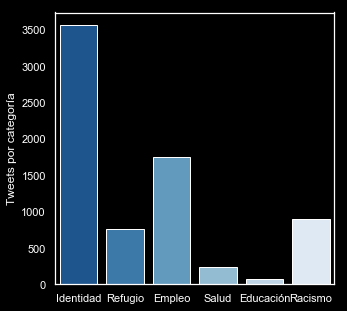

In [74]:
#GRAPH TWEETS CLASIFIED BY CATEGORY
#CREATE SET WITH TWEETS CLASIFIED WITH VALUES 1 TO 6
target = tweets[tweets['target'] != 0]
target.shape

#SET THE PLOT CHARACTERISTICS
plt.style.use("dark_background")
ax=sns.countplot(x='target', data=target, palette="Blues_r")
sns.set(font_scale=1, rc={'figure.figsize':(5, 5)}, palette="Blues_r")
plt.grid(color='black')
sns.axes_style(style='dark')
plt.xticks(rotation=0)
labels = ['Identidad', 'Refugio', 'Empleo', 'Salud', 'Educación', 'Racismo']
ax.set_xticklabels(labels)
plt.ylabel('Tweets por categoría')
plt.xlabel("")
plt.show()

## 7. Geo tweets 

In [111]:
#FILTERING TWEETS THAT HAVE GEOLOCATION
tweets_geo = tweets[tweets['geo_coordinates'].notnull()]
tweets_geo.shape

(3307, 20)

In [112]:
tweets_geo['geo_coordinates'] = tweets_geo['geo_coordinates'].str.replace('loc: ', '') #REMOVE LOC FROM EACH TWEET
tweets_geo['latitude'] = tweets_geo['geo_coordinates'].apply(lambda x: x.split(',')[0]) #CREATE A LATITUDE COLUM AND ASSIGN IT THE LAT VALUE OF GEOCORDINATE
tweets_geo['longitude'] = tweets_geo['geo_coordinates'].apply(lambda x: x.split(',')[1]) #CREATE A LONGITUDE COLUM AND ASSIGN IT THE LONG VALUE OF GEOCORDINATE

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [113]:
#Re-projecting is the process of changing the representation of locations from one coordinate system to another. 
#Assign CRS to the GeoPandas object to re-project.
crs = {'init': 'epsg:4326'}

In [114]:
#Set longitude and latitude to numeric format
tweets_geo[['longitude', 'latitude']] = tweets_geo[['longitude', 'latitude']].apply(pd.to_numeric) 

/Users/belensanchez/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [115]:
#Generate a geometry column to generate gegoraphic visualizations(maps).
geometry = [Point(xy) for xy in zip (tweets_geo['longitude'], tweets_geo['latitude'])]

geo_tweets = gpd.GeoDataFrame(tweets_geo,
                              crs = crs,
                              geometry = geometry)

In [116]:
geo_tweets.head(3)

,Unnamed: 0,id_str,from_user,tweet,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,...,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,target,latitude,longitude,geometry
0,0,1.119288e+18,edgarjmendezt,#familytime #cookingtime #friday #venezolanose...,Fri Apr 19 17:12:35 +0000 2019,19/04/2019 18:12:35,"28.5421,-81.3775",es,NaN,NaN,...,http://pbs.twimg.com/profile_images/1093853883...,139.0,201.0,"Orlando, Florida, USA",http://twitter.com/edgarjmendezt/statuses/1119...,"{""hashtags"":[{""text"":""familytime"",""indices"":[0...",0,28.542100,-81.377500,POINT (-81.3775 28.5421)
8,8,1.119270e+18,maor_x,"Pésaj en familia, a la venezolana! #פסח #Venez...",Fri Apr 19 16:01:30 +0000 2019,19/04/2019 17:01:30,"31.76316667,35.22105278",en,NaN,NaN,...,http://pbs.twimg.com/profile_images/1074696044...,580.0,715.0,"Jerusalem, Israel",http://twitter.com/maor_x/statuses/11192698013...,"{""hashtags"":[{""text"":""פסח"",""indices"":[35,39]},...",0,31.763167,35.221053,POINT (35.22105278 31.76316667)
31,31,1.119230e+18,emiliojosenota,Un poco más del paseo #lima #venezolanosenperu...,Fri Apr 19 13:25:12 +0000 2019,19/04/2019 14:25:12,"-12.0707974,-77.03402738",es,NaN,NaN,...,http://pbs.twimg.com/profile_images/7813275210...,542.0,863.0,Lima. Perú,http://twitter.com/emiliojosenota/statuses/111...,"{""hashtags"":[{""text"":""lima"",""indices"":[22,27]}...",0,-12.070797,-77.034027,POINT (-77.03402738 -12.0707974)


## 8. Visualizacion interactiva con Plot.ly

In [117]:
##ASSIGN LABELS TO EACH TARGET VALUE ON GEOTWEETS DATA
geo_tweets.loc[geo_tweets['target'] == 0, 'Need'] = 'Otro'
geo_tweets.loc[geo_tweets['target'] == 1, 'Need'] = 'Identidad'
geo_tweets.loc[geo_tweets['target'] == 2, 'Need'] = 'Refugio'
geo_tweets.loc[geo_tweets['target'] == 3, 'Need'] = 'Empleo'
geo_tweets.loc[geo_tweets['target'] == 4, 'Need'] = 'Salud'
geo_tweets.loc[geo_tweets['target'] == 5, 'Need'] = 'Educación'
geo_tweets.loc[geo_tweets['target'] == 6, 'Need'] = 'Racismo'


In [118]:
##SO FAR ALL THE TWEETS WITH GEOLOCATION ARE CLASSIFIED AS OTHER
geo_tweets['Need'].value_counts()

Otro    3307
Name: Need, dtype: int64

In [119]:
# SETTING PLOT.LY USER, API KEY AND ACCESS TOKEN
plotly.tools.set_credentials_file(username='YOURUSERNAME', api_key='YOURAPIKEY')
mapbox_access_token = 'YOURACCESSTOKEN'

In [121]:
# ASSIGN GEO_TWEES TO DF AND CREATE LIST OF EVENT TYPES
df = geo_tweets
event_types = ['Otro','Identidad', 'Refugio', 'Empleo', 'Salud', 'Educación', 'Racismo']

In [122]:
# CREATE A DICTIONARY WITH LATITUDES AND LONGITUDES FOR EACH EVENT IN GEOTWEETS
data = []
for event in event_types:
    event_data = dict(
            lat = df.loc[df['Need'] == event,'latitude'],
            lon = df.loc[df['Need'] == event,'longitude'],
            name = event,
            marker = dict(size = 8, opacity = 0.5),
            type = 'scattermapbox'
        )
    data.append(event_data)

In [123]:
#SET ACCESS AND CHARACTERISTICS OF YOUR PLOT.LY GRAPH
layout = dict(
    height = 800,
    # TOP, BOTTOM, LEFT AND RIGHT MARGINS
    margin = dict(t = 0, b = 0, l = 0, r = 0),
    font = dict(color = '#FFFFFF', size = 11), #FONT COLOR AND SIZE
    paper_bgcolor = '#000000',  #BACKGROUND COLOR
    mapbox = dict(
        # HERE ENTER THE TOKEN FROM MAPBOX
        accesstoken = mapbox_access_token,
        bearing = 0,
        # DEFINE WHERE YOU WANT THE MAP TO BE CENTERED
        center = dict(
            lat = 38,
            lon = -94
        ),
        # SETS MAP TO BE PARALLEL TO SCREEN WITN NO ANGLE
        pitch = 0,
        # SET DEFAULT LEVEL OF ZOOM
        zoom = 3,
        # SET DEFAULT MAP STYLE
        style = 'dark'
    )
)

In [124]:
#SET UP THE ANNOTATIONS OF THE GRAPH
annotations = [dict(
  
              # THIS IS THE TEXT YOU WANT TO DISPLAY 
              text = 'Tweets Sept. 2018 - Abr. 2019', 
              
              # SET FOND AND BORDER CHARACTERISTICS
              font = dict(color = '#FFFFFF', size = 14), borderpad = 10, 
              
              # POSITIONAL ARGUMENTS
              x = 0.05, y = 0.05, xref = 'paper', yref = 'paper', align = 'left', 
              
              # DON'T SHOW ARROW AND SET BACKGROUND COLOR 
              showarrow = False, bgcolor = 'black'
              )]

# ASSIGN ANNOTATIONS TO THE LAYOUT 
layout['annotations'] = annotations

In [125]:
# SET UP DROP DOWN MENUS OF YOUR GRAPH
updatemenus=list([
    # DROP-DOWN 1: MAP STYLES MENU 
    # BUTTONS CONTAINES AS MANY MAP STYLES YOU WANT TO OFFER
    dict(
        buttons=list([
            dict(
                args=['mapbox.style', 'dark'],
                label='Dark',
                method='relayout'
            ),                    
            dict(
                args=['mapbox.style', 'light'],
                label='Light',
                method='relayout'
            ),
            dict(
                args=['mapbox.style', 'outdoors'],
                label='Outdoors',
                method='relayout'
            ),
            dict(
                args=['mapbox.style', 'satellite-streets'],
                label='Satellite with Streets',
                method='relayout'
            )                    
        ]),
        # SET DIRECTION WHERE YOU WANT MENU TO EXPAND 
        direction = 'up',
      
        # SET LOCATION FOR DROP-DOWN MENU ON MAP
        x = 0.75,
        xanchor = 'left',
        y = 0.05,
        yanchor = 'bottom',
      
        # SPECIFY FONT SIZE AND COLORS 
        bgcolor = '#000000',
        bordercolor = '#FFFFFF',
        font = dict(size=11)
    ),    
    
    # DROP-DOWN 2: SELECT TYPE OF NEED TO VISUALIZE 
    dict(
         # for each button you specify which dictionaries of my data list you want to visualize. Remember I have 7 different
         # types of needs but I have to include 8 options in total: the first will show all of them, only
         # one type at the time will be shown on the map
         buttons=list([
            dict(label = 'Todos',
                 method = 'update',
                 args = [{'visible': [True, True, True, True, True, True, True]}]),
            dict(label = 'Otro',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]}]),
            dict(label = 'Identidad',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]}]),
             dict(label = 'Refugio',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]}]),
             dict(label = 'Empleo',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]}]),
             dict(label = 'Salud',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]}]),
             dict(label = 'Educación',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]}]),
             dict(label = 'Racismo',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]}])
        ]),
        # SET DIRECTION WHERE DROP-DOWN EXPANDS WHEN OPENED 
        direction = 'down',
        # POSITIONAL ARGUMENTS
        x = 0.01,
        xanchor = 'left',
        y = 0.99,
        yanchor = 'bottom',
        # FONTS AND BORDER
        bgcolor = '#000000',
        bordercolor = '#FFFFFF',
        font = dict(size=11)
    )
])

# ASSIGN LIST OF DICTIONARIES TO THE LAYOUT 
layout['updatemenus'] = updatemenus


In [126]:
layout['title'] = 'Geo Tweets '

In [127]:
figure1 = dict(data = data, layout = layout)
py.iplot(figure1, filename = 'Geotweets')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~belencito27/0 or inside your plot.ly account where it is named 'Geotweets'
